## Practise Problem To Master skills

## 1. Load and Prepare Dataset

In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

%matplotlib inline

dataset = read_csv('data/daily-total-female-births.csv')

print(dataset.head(10))

         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44
5  1959-01-06      29
6  1959-01-07      45
7  1959-01-08      43
8  1959-01-09      38
9  1959-01-10      27


In [8]:
d = dataset.sort_values(by='Date')
d[-10:]

,Date,Births
355,1959-12-22,39
356,1959-12-23,40
357,1959-12-24,38
358,1959-12-25,44
359,1959-12-26,34
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


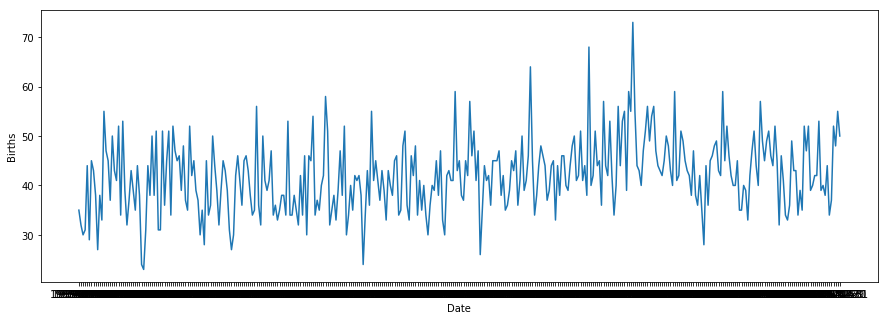

In [12]:
plt.plot(dataset.Date, dataset['Births'])
plt.xlabel('Date')
plt.ylabel('Births')
plt.gcf().set_size_inches(15,5)
plt.show()

In [21]:
# Save the births into a data frame
births_df = pd.DataFrame()
births_df['Births'] = dataset['Births']
births_df[:10]

,Births
0,35
1,32
2,30
3,31
4,44
5,29
6,45
7,43
8,38
9,27


In [24]:
# convert the dataframe into a time series


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n,...,t-1)
    
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t,t+1,...,t+n)
    
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

ts_data = series_to_supervised(births_df)
print(ts_data[:10])

    var1(t-1)  var1(t)
1        35.0       32
2        32.0       30
3        30.0       31
4        31.0       44
5        44.0       29
6        29.0       45
7        45.0       43
8        43.0       38
9        38.0       27
10       27.0       38
